In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set(rc={'figure.figsize':(50,50)})
#plt.figure(figsize=(15,25))     #11.7,8.27

In [2]:
df = pd.read_csv(r'C:\Users\shiva\OneDrive\Desktop\marketing_campaign excel.csv')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
del df['ID']
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

C:\Users\shiva\AppData\Local\Temp/ipykernel_36188/3270116335.py:2: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\shiva\AppData\Local\Temp/ipykernel_36188/3270116335.py:2: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\shiva\AppData\Local\Temp/ipykernel_36188/3270116335.py:2: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\shiva\AppData\Local\Temp/ipykernel_36188/3270116335.py:2: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_date

In [ ]:
t_dt = '2014-12-06'
t_dt = pd.to_datetime(t_dt)
print(type(t_dt))
df['No_of_days_from_enrol'] = t_dt - df['Dt_Customer']
df

In [6]:
df['Days_from_enrol'] = df['No_of_days_from_enrol'].dt.days
del df['No_of_days_from_enrol']
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Days_from_enrol
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,0,0,0,0,0,0,3,11,1,971
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,0,0,0,0,0,0,3,11,0,125
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,3,11,0,472
3,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,...,0,0,0,0,0,0,3,11,0,65
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,3,11,0,321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,0,0,3,11,0,541
2236,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,...,0,0,0,1,0,0,3,11,0,61
2237,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,0,1,0,0,0,0,3,11,0,315
2238,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,0,0,3,11,0,316


In [7]:
df['Age'] = df['Dt_Customer'].dt.year - df['Year_Birth']
del  df['Year_Birth']

In [10]:
def funchildk(p):
    if p > 0:
        return 1
    else:
        return 0
    
def funchildt(p):
    if p > 0:
        return 2
    else :
        return 0
    
def funchild(p):
    if p > 2:
        return 'Both'
    elif p == 0:
        return 'No Child'
    elif p== 1:
        return 'Kid'
    elif p == 2:
        return 'Teen'

df['total_mnt'] = df['MntWines'] + df['MntFishProducts'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['total_purchaces'] = df['NumDealsPurchases'] + df['NumCatalogPurchases'] + df['NumWebPurchases'] + df['NumStorePurchases'] + df['NumWebVisitsMonth']
df['AverageSpent'] = round(df['total_mnt'] / df['total_purchaces'], 2)
df['childk'] = df.Kidhome.apply(funchildk)
df['childt'] = df.Teenhome.apply(funchildt)
df['child_c'] = df.childk + df.childt
df['child_c'] = df.child_c.apply(funchild)
df['t_child'] = df.Kidhome +  df.Teenhome

df.drop('childk', axis = 1, inplace = True)
df.drop('childt', axis = 1, inplace = True)


df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Z_CostContact,Z_Revenue,Response,Days_from_enrol,Age,total_mnt,total_purchaces,AverageSpent,child_c,t_child
0,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,...,3,11,1,971,55,1529,32,47.78,No Child,0
1,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,...,3,11,0,125,60,26,11,2.36,Both,2
2,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,...,3,11,0,472,48,727,25,29.08,No Child,0
3,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,...,3,11,0,65,30,49,14,3.50,Kid,1
4,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,...,3,11,0,321,33,379,24,15.79,Kid,1


In [11]:
df.Education.value_counts(), df.Marital_Status.value_counts()

(Graduation    1127
 PhD            486
 Master         370
 2n Cycle       203
 Basic           54
 Name: Education, dtype: int64,
 Married     864
 Together    580
 Single      480
 Divorced    232
 Widow        77
 Alone         3
 Absurd        2
 YOLO          2
 Name: Marital_Status, dtype: int64)

In [12]:
df.Education = df['Education'].replace({"PhD" : "Postgraduate", "Master" : "Postgraduate", "2n Cycle" : "Postgraduate", "Basic" : "Undergraduate", "Graduation" : "Graduate"})
df.Marital_Status = df.Marital_Status.replace({'Married' : 'Relationship', 'Together' : 'Relationship', 'Single' : 'Single', 'Widow' : 'Single', 'Divorced' : 'Single', 'Alone' : 'Single', 'Absurd' : 'Single', 'YOLO' : 'Single'})
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Z_CostContact,Z_Revenue,Response,Days_from_enrol,Age,total_mnt,total_purchaces,AverageSpent,child_c,t_child
0,Graduate,Single,58138.0,0,0,2012-04-09,58,635,88,546,...,3,11,1,971,55,1529,32,47.78,No Child,0
1,Graduate,Single,46344.0,1,1,2014-08-03,38,11,1,6,...,3,11,0,125,60,26,11,2.36,Both,2
2,Graduate,Relationship,71613.0,0,0,2013-08-21,26,426,49,127,...,3,11,0,472,48,727,25,29.08,No Child,0
3,Graduate,Relationship,26646.0,1,0,2014-10-02,26,11,4,20,...,3,11,0,65,30,49,14,3.50,Kid,1
4,Postgraduate,Relationship,58293.0,1,0,2014-01-19,94,173,43,118,...,3,11,0,321,33,379,24,15.79,Kid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,Relationship,61223.0,0,1,2013-06-13,46,709,43,182,...,3,11,0,541,46,1298,23,56.43,Teen,1
2236,Postgraduate,Relationship,64014.0,2,1,2014-10-06,56,406,0,30,...,3,11,0,61,68,444,29,15.31,Both,3
2237,Graduate,Single,56981.0,0,0,2014-01-25,91,908,48,217,...,3,11,0,315,33,1193,25,47.72,No Child,0
2238,Postgraduate,Relationship,69245.0,0,1,2014-01-24,8,428,30,214,...,3,11,0,316,58,813,26,31.27,Teen,1


In [13]:
df["Family_Size"] = 0
for i in range(len(df)) :
    if df['Family_Size'][i] == 'Relationship' :
        df['Family_Size'][i] = 2 + df['t_child'][i]
    else:
        df['Family_Size'][i] = 1 + df['t_child'][i]
    

df

C:\Users\shiva\AppData\Local\Temp/ipykernel_36188/3358712655.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Family_Size'][i] = 1 + df['t_child'][i]


,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Z_Revenue,Response,Days_from_enrol,Age,total_mnt,total_purchaces,AverageSpent,child_c,t_child,Family_Size
0,Graduate,Single,58138.0,0,0,2012-04-09,58,635,88,546,...,11,1,971,55,1529,32,47.78,No Child,0,1
1,Graduate,Single,46344.0,1,1,2014-08-03,38,11,1,6,...,11,0,125,60,26,11,2.36,Both,2,3
2,Graduate,Relationship,71613.0,0,0,2013-08-21,26,426,49,127,...,11,0,472,48,727,25,29.08,No Child,0,1
3,Graduate,Relationship,26646.0,1,0,2014-10-02,26,11,4,20,...,11,0,65,30,49,14,3.50,Kid,1,2
4,Postgraduate,Relationship,58293.0,1,0,2014-01-19,94,173,43,118,...,11,0,321,33,379,24,15.79,Kid,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,Relationship,61223.0,0,1,2013-06-13,46,709,43,182,...,11,0,541,46,1298,23,56.43,Teen,1,2
2236,Postgraduate,Relationship,64014.0,2,1,2014-10-06,56,406,0,30,...,11,0,61,68,444,29,15.31,Both,3,4
2237,Graduate,Single,56981.0,0,0,2014-01-25,91,908,48,217,...,11,0,315,33,1193,25,47.72,No Child,0,1
2238,Postgraduate,Relationship,69245.0,0,1,2014-01-24,8,428,30,214,...,11,0,316,58,813,26,31.27,Teen,1,2


In [14]:
df.Income.fillna(df.Income.mean(), inplace=True)
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Z_Revenue,Response,Days_from_enrol,Age,total_mnt,total_purchaces,AverageSpent,child_c,t_child,Family_Size
0,Graduate,Single,58138.0,0,0,2012-04-09,58,635,88,546,...,11,1,971,55,1529,32,47.78,No Child,0,1
1,Graduate,Single,46344.0,1,1,2014-08-03,38,11,1,6,...,11,0,125,60,26,11,2.36,Both,2,3
2,Graduate,Relationship,71613.0,0,0,2013-08-21,26,426,49,127,...,11,0,472,48,727,25,29.08,No Child,0,1
3,Graduate,Relationship,26646.0,1,0,2014-10-02,26,11,4,20,...,11,0,65,30,49,14,3.50,Kid,1,2
4,Postgraduate,Relationship,58293.0,1,0,2014-01-19,94,173,43,118,...,11,0,321,33,379,24,15.79,Kid,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,Relationship,61223.0,0,1,2013-06-13,46,709,43,182,...,11,0,541,46,1298,23,56.43,Teen,1,2
2236,Postgraduate,Relationship,64014.0,2,1,2014-10-06,56,406,0,30,...,11,0,61,68,444,29,15.31,Both,3,4
2237,Graduate,Single,56981.0,0,0,2014-01-25,91,908,48,217,...,11,0,315,33,1193,25,47.72,No Child,0,1
2238,Postgraduate,Relationship,69245.0,0,1,2014-01-24,8,428,30,214,...,11,0,316,58,813,26,31.27,Teen,1,2


In [15]:
df.isnull().sum(), df.dtypes


(Education              0
 Marital_Status         0
 Income                 0
 Kidhome                0
 Teenhome               0
 Dt_Customer            0
 Recency                0
 MntWines               0
 MntFruits              0
 MntMeatProducts        0
 MntFishProducts        0
 MntSweetProducts       0
 MntGoldProds           0
 NumDealsPurchases      0
 NumWebPurchases        0
 NumCatalogPurchases    0
 NumStorePurchases      0
 NumWebVisitsMonth      0
 AcceptedCmp3           0
 AcceptedCmp4           0
 AcceptedCmp5           0
 AcceptedCmp1           0
 AcceptedCmp2           0
 Complain               0
 Z_CostContact          0
 Z_Revenue              0
 Response               0
 Days_from_enrol        0
 Age                    0
 total_mnt              0
 total_purchaces        0
 AverageSpent           0
 child_c                0
 t_child                0
 Family_Size            0
 dtype: int64,
 Education                      object
 Marital_Status                 obje

In [ ]:
p=sns.relplot(x='Average Spent', y='total_mnt', data=df, kind='line', col='Marital_Status', col_wrap=2, hue='child_c')
#plt.figure(figsize=(15,8))
p.fig.set_dpi(100)
plt.show()


KeyboardInterrupt: 

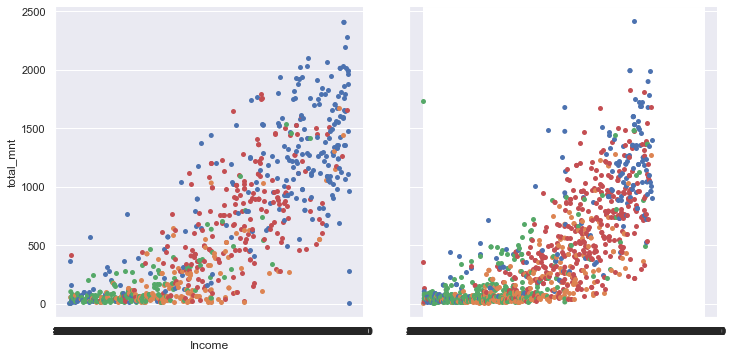

In [17]:
p=sns.catplot(x='Income', y='total_mnt', data=df,  col='Marital_Status', col_wrap=2, hue='child_c')
#plt.figure(figsize=(15,8))
p.fig.set_dpi(100)
plt.show()


In [ ]:
p=sns.relplot(x='Income', y='total_mnt', data=df,  col='Marital_Status', col_wrap=2, hue='child_c')
#plt.figure(figsize=(15,8))
p.fig.set_dpi(100)
plt.show()

In [ ]:
df.isnull().sum(), df.dtypes

In [ ]:
sns.catplot(x='total_mnt', y='Income', data=df, kind='bar', col='Marital_Status', col_wrap=1, hue='child', aspect=30/12)
#plt.figure(figsize=(75,50))
#p.fig.set_dpi(100)
plt.show()


In [ ]:
p=sns.catplot(x='total_mnt', y='Income', data=df[0:10], kind='bar', col='Marital_Status', col_wrap=1, hue='child', aspect=25/8.27)
sns.set(rc={'figure.figsize':(50,5)})
#p.fig.set_dpi(100)
plt.figure(figsize=(75,50))
# fig_size = plt.rcParams["figure.figsize"]
# print ("Current size:", fig_size)

# fig_size[0] = 14
# fig_size[1] = 200
# plt.rcParams["figure.figsize"] = fig_size

# fig_size = plt.rcParams["figure.figsize"]
# print ("Current size:", fig_size)
plt.plot(df['total_mnt'][0:10], df['Income'][0:10])
plt.show()


In [ ]:
sns.catplot(x='Income', y='MntFruits', data=df, kind='bar', col='Marital_Status', col_wrap=2, hue='child', aspect=25/11)
#plt.figure(figsize=(15,15))
#p.fig.set_dpi(100)
plt.show()


In [ ]:
from sklearn.preprocessing import RobustScaler
X = [[ 1., -2.,  2.],
     [ -2.,  1.,  3.],
     [ 4.,  1., -2.]]
y = [[ 5., -7.,  3.],
     [ -6.,  1.,  3.],
     [ 4.,  1., -4.]]
transformer = RobustScaler()
n=transformer.fit_transform(y)
n

In [ ]:
df.head()

In [ ]:
scaler = RobustScaler()
s_df = scaler.fit_transform(df.iloc[:, 2:])
col = df.columns[2:]
s_df = pd.DataFrame(s_df, columns=col)
s_df['Education'], s_df['Marital_Status'] = df['Education'], df['Marital_Status']


In [ ]:
sns.catplot(x=['MntWines', 'MntFruits'], y='Income', data=s_df[0:10], kind='bar',  hue='child', aspect=25/8.27)

plt.show()

In [ ]:
for i in  df.columns:
    print(i)


In [ ]:
sns.kdeplot(df['total_purchaces'], df['Income'], shade=True, aspect=5/30)
# sns.heatmap(df['total_purchaces'], df['Income'], annot=True, fmt="d", aspect=5/30)
sns.jointplot(df['total_purchaces'], df['Income'], kind='hex')


In [ ]:
sns.catplot(x='Income', y='MntFruits', data=s_df, kind='bar', hue='child', aspect=25/11)
#plt.figure(figsize=(15,15))
#p.fig.set_dpi(100)
plt.show()
